## Importing Packages and Modules

In [1]:
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import time
import os
from datetime import timedelta

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.0.0


In [6]:
import keras
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input

Using TensorFlow backend.


## Loading Data

In [73]:
h5f = h5py.File('MNIST_synthetic.h5','r')

X_train = h5f['train_dataset'][:]
y_train = h5f['train_labels'][:]
X_val = h5f['valid_dataset'][:]
y_val = h5f['valid_labels'][:]
X_test = h5f['test_dataset'][:]
y_test = h5f['test_labels'][:]

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

h5f.close()

Training set (37500, 64, 64, 1) (37500, 5)
Validation set (2500, 64, 64, 1) (2500, 5)
Test set (10000, 64, 64, 1) (10000, 5)


## Analysing Data

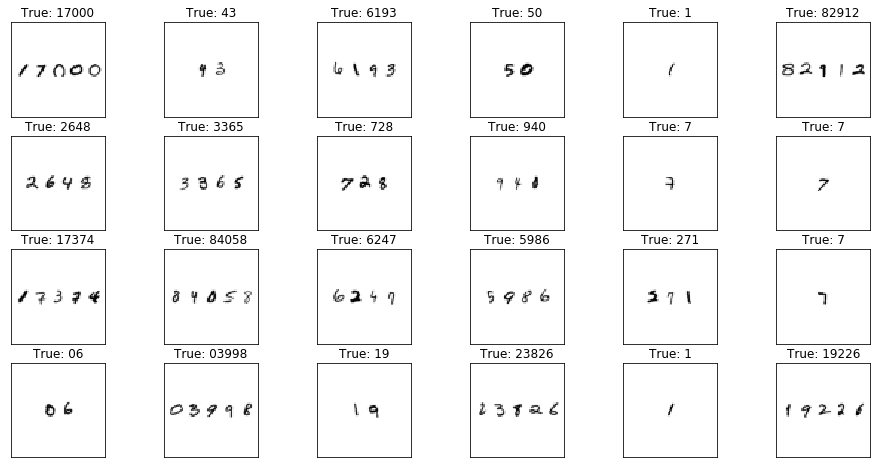

In [74]:
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    
    # Initialize figure
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    
    for i, ax in enumerate(axes.flat): 
        
        # Pretty string with actual number
        true_number = ''.join(str(x) for x in cls_true[i] if x != 10)
        title = "True: {0}".format(true_number)
        ax.imshow(images[i,:,:,0], cmap='binary')
        ax.set_title(title)   
        ax.set_xticks([]);
        ax.set_yticks([])
        
        
# Plot some sample images
plot_images(X_train, 4, 6, y_train);

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes = 11)
y_val = keras.utils.to_categorical(y_val, num_classes = 11)
y_test = keras.utils.to_categorical(y_test, num_classes = 11)
print(y_train.shape)
print(y_train[0][:][:])

(37500, 5, 11)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Building Model

In [8]:
x1 = Input(shape=(64,64,1))
x = Conv2D(16, (5, 5), padding="same")(x1)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (5, 5), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (5, 5), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(64)(x)
x = Activation("relu")(x)
a = Dense(11, activation = 'softmax')(x)
b = Dense(11, activation = 'softmax')(x)
c = Dense(11, activation = 'softmax')(x)
d = Dense(11, activation = 'softmax')(x)
e = Dense(11, activation = 'softmax')(x)
model  = Model(
    inputs=x1,
    outputs=[a,b,c,d,e],
)

In [9]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3), loss=[
    keras.losses.CategoricalCrossentropy(),
    keras.losses.CategoricalCrossentropy(),
    keras.losses.CategoricalCrossentropy(),
    keras.losses.CategoricalCrossentropy(),
    keras.losses.CategoricalCrossentropy(),
    ], metrics=['accuracy','accuracy','accuracy','accuracy','accuracy'])


In [10]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   416         input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16)   64          activation_1[0][0]               
____________________________________________________________________________________________

In [11]:
print(y_val.shape)
print(X_train.shape)
y = np.ndarray(shape=(5,37500,11))
for i in range(y_train.shape[0]):
    for j in range(y_train.shape[1]):
        y[j][i] = y_train[i][j]
yval = np.ndarray(shape=(5,2500,11))
for i in range(y_val.shape[0]):
    for j in range(y_val.shape[1]):
        yval[j][i] = y_val[i][j]
ytest = np.ndarray(shape=(5,10000,11))
for i in range(y_test.shape[0]):
    for j in range(y_test.shape[1]):
        ytest[j][i] = y_test[i][j]
print(y.shape,yval.shape,ytest.shape)

(2500, 5, 11)
(37500, 64, 64, 1)
(5, 37500, 11) (5, 2500, 11) (5, 10000, 11)


## Training model

In [12]:
model.fit(x=X_train,y=[y[0],y[1],y[2],y[3],y[4]],epochs = 20,batch_size=64, validation_data=(X_val,[yval[0],yval[1],yval[2],yval[3],yval[4]]))

Train on 37500 samples, validate on 2500 samples
Epoch 1/20
37500/37500 [==============================] - 231s 6ms/step - loss: 4.9040 - dense_2_loss: 1.2897 - dense_3_loss: 1.2922 - dense_4_loss: 1.0622 - dense_5_loss: 0.7640 - dense_6_loss: 0.4956 - dense_2_accuracy: 0.5993 - dense_3_accuracy: 0.5867 - dense_4_accuracy: 0.6644 - dense_5_accuracy: 0.7473 - dense_6_accuracy: 0.8564 - val_loss: 1.2517 - val_dense_2_loss: 0.3089 - val_dense_3_loss: 0.3640 - val_dense_4_loss: 0.2873 - val_dense_5_loss: 0.1730 - val_dense_6_loss: 0.1449 - val_dense_2_accuracy: 0.9160 - val_dense_3_accuracy: 0.8908 - val_dense_4_accuracy: 0.9068 - val_dense_5_accuracy: 0.9460 - val_dense_6_accuracy: 0.9652
Epoch 2/20
37500/37500 [==============================] - 227s 6ms/step - loss: 0.9723 - dense_2_loss: 0.2536 - dense_3_loss: 0.2612 - dense_4_loss: 0.2194 - dense_5_loss: 0.1478 - dense_6_loss: 0.0904 - dense_2_accuracy: 0.9295 - dense_3_accuracy: 0.9240 - dense_4_accuracy: 0.9353 - dense_5_accuracy: 0.

Epoch 14/20
37500/37500 [==============================] - 226s 6ms/step - loss: 0.0614 - dense_2_loss: 0.0175 - dense_3_loss: 0.0173 - dense_4_loss: 0.0134 - dense_5_loss: 0.0093 - dense_6_loss: 0.0040 - dense_2_accuracy: 0.9947 - dense_3_accuracy: 0.9948 - dense_4_accuracy: 0.9955 - dense_5_accuracy: 0.9970 - dense_6_accuracy: 0.9987 - val_loss: 0.2988 - val_dense_2_loss: 0.1042 - val_dense_3_loss: 0.0789 - val_dense_4_loss: 0.0633 - val_dense_5_loss: 0.0343 - val_dense_6_loss: 0.0112 - val_dense_2_accuracy: 0.9820 - val_dense_3_accuracy: 0.9872 - val_dense_4_accuracy: 0.9864 - val_dense_5_accuracy: 0.9940 - val_dense_6_accuracy: 0.9976
Epoch 15/20
37500/37500 [==============================] - 226s 6ms/step - loss: 0.0527 - dense_2_loss: 0.0168 - dense_3_loss: 0.0141 - dense_4_loss: 0.0111 - dense_5_loss: 0.0080 - dense_6_loss: 0.0027 - dense_2_accuracy: 0.9945 - dense_3_accuracy: 0.9958 - dense_4_accuracy: 0.9964 - dense_5_accuracy: 0.9976 - dense_6_accuracy: 0.9991 - val_loss: 0.3

## Evaluating Model

In [13]:
score = model.evaluate(x=X_test,y=[ytest[0],ytest[1],ytest[2],ytest[3],ytest[4]])

10000/10000 [==============================] - 22s 2ms/step


In [83]:
accuracy =0;
print('------------------------------------------------------------------------')
for i in range(6,11):
    accuracy += score[i]
    print('Accuracy for ',(i-5),'digit\'s position is: ',score[i]*100,"%")
print('------------------------------------------------------------------------')
print('Overall accuracy of model for all five positions is: ',accuracy/5*100,'%')

------------------------------------------------------------------------
Accuracy for  1 digit's position is:  98.25999736785889 %
Accuracy for  2 digit's position is:  98.18999767303467 %
Accuracy for  3 digit's position is:  98.64000082015991 %
Accuracy for  4 digit's position is:  98.87999892234802 %
Accuracy for  5 digit's position is:  99.58999752998352 %
------------------------------------------------------------------------
Overall accuracy of model for all five positions is:  98.711998462677 %


In [67]:
eg = np.zeros(shape=(500,64,64,1))
for i in range(500):
    eg[i] = X_test[i]
arr = model.predict(eg)

In [70]:
yhash = np.ndarray(shape = (500,5,11))
for i in range(500):
    for j in range(5):
        yhash[i][j] = arr[j][i]
print(yhash[0][1])

yactual = np.ndarray(shape = (500,5,11))
for i in range(500):
    for j in range(5):
        yactual[i][j] = ytest[j][i]
print(yactual[0][1])

[7.86193159e-12 2.39522239e-11 1.00000000e+00 6.66596464e-15
 8.23130965e-14 1.12780590e-14 1.24024651e-13 1.11468473e-12
 1.40724436e-14 8.78541014e-14 3.92308864e-21]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [64]:
# Helper function to convert categorical data to numerical data
def num(a):
    number = np.argmax(a[0])
    for i in range(4):
        if np.argmax(a[i+1])< 10:
            number = number*10
            number = number + np.argmax(a[i+1])
    return number

## Plotting some images with true and predected values

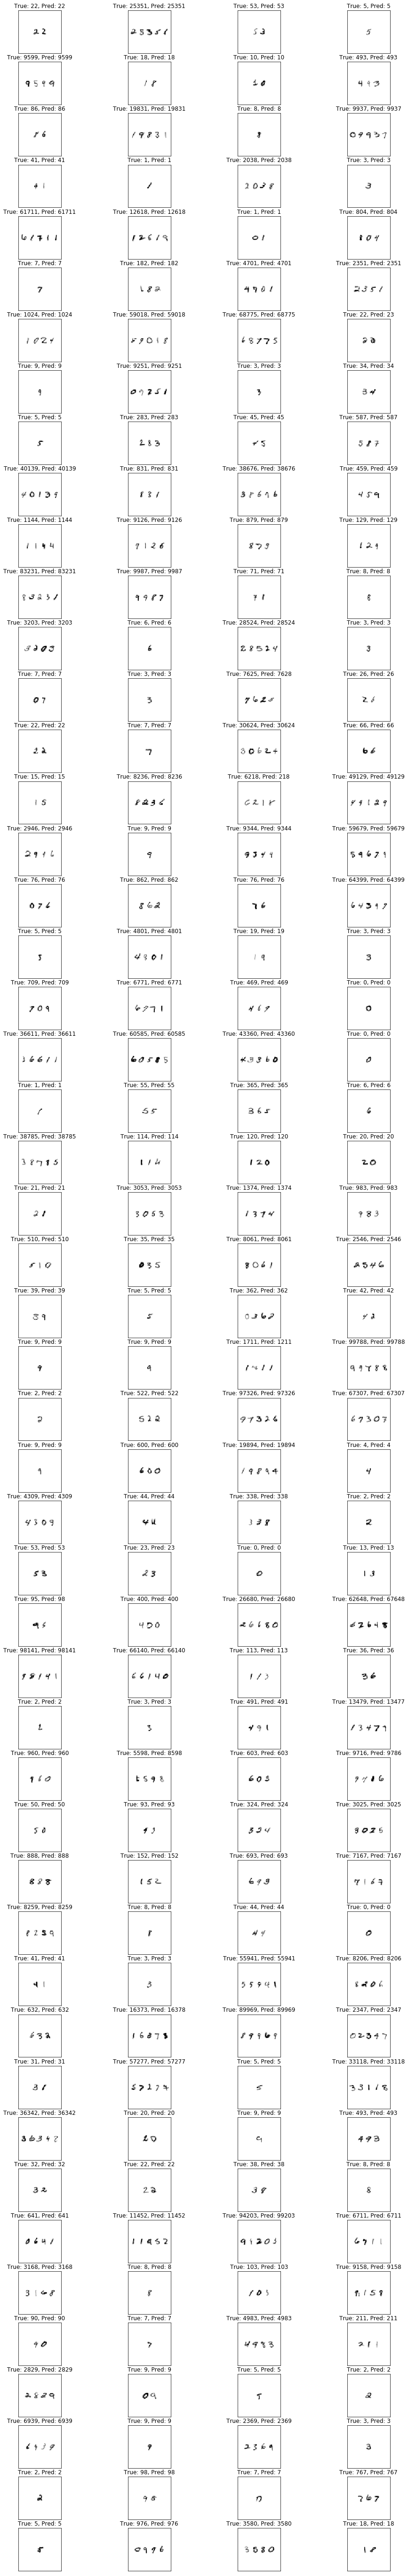

In [71]:
fig, axes = plt.subplots(50, 4, figsize=(16, 2*50))

for i, ax in enumerate(axes.flat): 
        
        true_number = num(y_test[i][:])
        pred_number = num(yhash[i][:])
        title = "True: {0}, Pred: {1}".format(true_number, pred_number) 
            
        ax.imshow(eg[i,:,:,0], cmap='binary')
        ax.set_title(title)   
        ax.set_xticks([]);
        ax.set_yticks([])

In [84]:
model_json = model.to_json()
with open("mnistmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mnistmodel.h5")
print("Saved model to disk")

Saved model to disk
